# 几何与线性代数运算
:label:`sec_geometry-linear-algebraic-ops`

在 :numref:`sec_linear-algebra` 中，我们遇到了线性代数的基础知识，并看到了它如何用于表达转换数据的常见操作。线性代数是支撑我们在深度学习乃至更广泛的机器学习领域工作的关键数学支柱之一。虽然 :numref:`sec_linear-algebra` 包含了足够的机制来解释现代深度学习模型的运作原理，但这个主题还有很多内容。在这一节中，我们将深入探讨，突出一些线性代数运算的几何解释，并介绍几个基本概念，包括特征值和特征向量。

## 向量的几何学
首先，我们需要讨论向量的两种常见的几何解释，即作为空间中的点或方向。从根本上说，向量是一组数字，例如下面的 Python 列表。

In [1]:
v = [1, 7, 0, 1]

数学家通常将这写成*列*向量或*行*向量，也就是说，

$$
\mathbf{x} = \begin{bmatrix}1\\7\\0\\1\end{bmatrix},
$$

或者

$$
\mathbf{x}^\top = \begin{bmatrix}1 & 7 & 0 & 1\end{bmatrix}.
$$

这些经常有不同的解释，其中数据样本是列向量，而用于形成加权和的权重是行向量。然而，灵活处理是有益的。正如我们在 :numref:`sec_linear-algebra` 中所描述的那样，虽然单个向量的默认方向是列向量，但对于表示表格数据集的任何矩阵来说，将每个数据样本视为矩阵中的行向量更为常见。

给定一个向量，我们首先应该将其视为空间中的一个点。在二维或三维中，我们可以通过使用向量的分量来定义相对于称为*原点*的固定参考的空间中的点的位置来可视化这些点。这可以在 :numref:`fig_grid` 中看到。

![通过将向量的分量作为点在平面上进行可视化的一种说明。向量的第一个分量给出$\mathit{x}$坐标，第二个分量给出$\mathit{y}$坐标。更高维度的情况类似，尽管更难以可视化。](../img/grid-points.svg)
:label:`fig_grid`

这种几何观点允许我们从更抽象的层次考虑问题。不再面对像分类图片为猫或狗这样看似无法克服的问题，我们可以开始将任务抽象地视为空间中点的集合，并将任务想象为发现如何分离两个不同的点群。

同时，人们对于向量常持有第二种观点：即作为空间中的方向。我们不仅可以将向量 $\mathbf{v} = [3,2]^\top$ 视为从原点向右 $3$ 单位、向上 $2$ 单位的位置，还可以将其视为本身的方向，即向右走 $3$ 步、向上走 $2$ 步。以这种方式，我们认为图 :numref:`fig_arrow` 中的所有向量都是相同的。

![任何向量都可以被可视化为空中的箭头。在这个例子中，绘制的每个向量都代表向量 $(3,2)^\top$。](../img/par-vec.svg)
:label:`fig_arrow`

这种转变的好处之一是我们可以直观理解向量相加的行为。特别是，我们先遵循一个向量给出的方向，然后跟随另一个向量给出的方向，如 :numref:`fig_add-vec` 所示。

![我们可以通过先跟随一个向量再跟随另一个向量来可视化向量相加。](../img/vec-add.svg)
:label:`fig_add-vec`

向量减法有类似的解释。考虑到等式 $\mathbf{u} = \mathbf{v} + (\mathbf{u}-\mathbf{v})$，我们看到向量 $\mathbf{u}-\mathbf{v}$ 是从点 $\mathbf{v}$ 到点 $\mathbf{u}$ 的方向。


## 点积与角度
正如我们在 :numref:`sec_linear-algebra` 中看到的，如果我们取两个列向量 $\mathbf{u}$ 和 $\mathbf{v}$，我们可以通过计算形成它们的点积：

$$\mathbf{u}^\top\mathbf{v} = \sum_i u_i\cdot v_i.$$
:eqlabel:`eq_dot_def`

由于 :eqref:`eq_dot_def` 是对称的，我们将采用经典乘法符号并写作

$$
\mathbf{u}\cdot\mathbf{v} = \mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u},
$$

以强调交换向量顺序会得到相同答案的事实。

点积 :eqref:`eq_dot_def` 也承认几何解释：它与两向量之间的角度密切相关。考虑 :numref:`fig_angle` 中显示的角度。

![平面内任意两个向量之间都有一个明确定义的角度 $\theta$。我们将看到这个角度与点积紧密相关。](../img/vec-angle.svg)
:label:`fig_angle`

首先，让我们考虑两个特定的向量：

$$
\mathbf{v} = (r,0) \; \textrm{和} \; \mathbf{w} = (s\cos(\theta), s \sin(\theta)).
$$

向量 $\mathbf{v}$ 长度为 $r$ 并且平行于 $x$ 轴，而向量 $\mathbf{w}$ 长度为 $s$ 并且与 $x$ 轴成 $\theta$ 角。如果我们计算这两个向量的点积，我们会发现

$$
\mathbf{v}\cdot\mathbf{w} = rs\cos(\theta) = \|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta).
$$

通过一些简单的代数操作，我们可以重新排列项以获得

$$
\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).
$$

简而言之，对于这两个特定向量，点积结合范数告诉我们两向量之间的角度。这一事实一般成立。我们不会在这里推导表达式，但是，如果我们将 $\|\mathbf{v} - \mathbf{w}\|^2$ 用两种方式写出：一种是利用点积，另一种是利用余弦定律几何地写出，我们就可以得到完整的关系。确实，对于任意两个向量 $\mathbf{v}$ 和 $\mathbf{w}$，两向量之间的角度为

$$\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).$$
:eqlabel:`eq_angle_forumla`

这是一个很好的结果，因为计算中没有任何部分引用了二维。实际上，我们可以在三维或三百万维中无问题地使用这个公式。

作为一个简单的例子，让我们看看如何计算一对向量之间的角度：

In [2]:
%matplotlib inline
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l


def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4]))

tensor(0.4190)

我们目前不会使用它，但了解这一点是有用的：我们将角度为 $\pi/2$（或等效地 $90^{\circ}$）的向量称为*正交*。通过检查上述方程，我们看到当 $\theta = \pi/2$ 时会发生这种情况，这与 $\cos(\theta) = 0$ 是同一件事。唯一可能发生这种情况的方式是点积本身为零，并且两个向量在且仅在 $\mathbf{v}\cdot\mathbf{w} = 0$ 时正交。这个公式在理解对象几何形状时将被证明是有帮助的。

问一个合理的问题：为什么计算角度有用？答案在于我们期望数据具有的不变性类型。考虑一张图片及其副本，其中每个像素值相同但亮度为原来的10%。单个像素的值通常远非原始值。因此，如果计算原始图像和较暗图像之间的距离，该距离可能很大。然而，对于大多数ML应用来说，*内容*是一样的——就猫/狗分类器而言，它仍然是一张猫的图片。然而，如果我们考虑角度，不难看出对于任何向量 $\mathbf{v}$，$\mathbf{v}$ 和 $0.1\cdot\mathbf{v}$ 之间的角度为零。这对应于缩放向量保持相同方向而只改变长度的事实。角度认为较暗的图像是相同的。

这样的例子到处都是。在文本中，我们可能希望讨论的主题不会因为我们写了一篇说同样事情但长度翻倍的文档而改变。对于某些编码（例如统计词汇表中单词出现次数），这对应于文档向量的加倍，因此我们再次可以使用角度。

### 余弦相似度
在使用角度测量两个向量接近程度的ML上下文中，从业者采用术语*余弦相似度*来指代部分
$$
\cos(\theta) = \frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}.
$$

当两个向量指向同一方向时，余弦取最大值1；当它们指向相反方向时，取最小值-1；当两个向量正交时，取值0。请注意，如果高维向量的分量以均值0随机采样，它们的余弦几乎总是接近0。

## 超平面

除了处理向量之外，另一个你必须理解才能在线性代数中走得更远的关键对象是*超平面*，它是对更高维度的线（二维）或平面（三维）的一般化。在$d$维向量空间中，超平面具有$d-1$维并将空间分为两个半空间。

让我们从一个例子开始。假设我们有一个列向量$\mathbf{w}=[2,1]^\top$。我们想知道，“哪些点$\mathbf{v}$满足$\mathbf{w}\cdot\mathbf{v} = 1$？”通过回忆上面的角度与点积的关系:eqref:`eq_angle_forumla`，我们可以看到这等价于
$$
\|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta) = 1 \; \iff \; \|\mathbf{v}\|\cos(\theta) = \frac{1}{\|\mathbf{w}\|} = \frac{1}{\sqrt{5}}.
$$

![回顾三角学，我们看到公式$\|\mathbf{v}\|\cos(\theta)$是向量$\mathbf{v}$在$\mathbf{w}$方向上的投影长度](../img/proj-vec.svg)
:label:`fig_vector-project`

如果我们考虑此表达式的几何意义，我们会发现这相当于说$\mathbf{v}$在$\mathbf{w}$方向上的投影长度恰好为$1/\|\mathbf{w}\|$，如:numref:`fig_vector-project`所示。所有满足这一条件的点构成一条与向量$\mathbf{w}$垂直的直线。如果我们愿意，我们可以找到这条直线的方程并看到它是$2x + y = 1$或等效地$y = 1 - 2x$。

现在，如果我们看看当我们询问$\mathbf{w}\cdot\mathbf{v} > 1$或$\mathbf{w}\cdot\mathbf{v} < 1$的点集时会发生什么，我们可以看到这些是投影长于或短于$1/\|\mathbf{w}\|$的情况。因此，这两个不等式定义了线的两侧。这样，我们就找到了一种将空间切成两半的方法，其中一侧的所有点的点积低于阈值，另一侧则高于阈值，如:numref:`fig_space-division`所示。

![现在，如果我们考虑表达式的不等式版本，我们看到我们的超平面（在这种情况下：只是一条线）将空间分成两半。](../img/space-division.svg)
:label:`fig_space-division`

在更高维度的故事大致相同。如果我们现在取$\mathbf{w} = [1,2,3]^\top$并询问三维中满足$\mathbf{w}\cdot\mathbf{v} = 1$的点，我们获得了一个与给定向量$\mathbf{w}$垂直的平面。两个不等式再次定义了平面的两侧，如:numref:`fig_higher-division`所示。

![在任何维度上，超平面都将空间分成两半。](../img/space-division-3d.svg)
:label:`fig_higher-division`

虽然我们的可视化能力到此为止，但这不妨碍我们在数十、数百甚至数十亿维度上这样做。这种情况经常出现在思考机器学习模型时。例如，我们可以理解像:numref:`sec_softmax`中的线性分类模型，作为找到区分不同目标类别的超平面的方法。在此背景下，这样的超平面通常被称为*决策平面*。大多数深度学习分类模型以一个线性层输入softmax结束，因此可以解释深度神经网络的作用是找到一个非线性嵌入，使得目标类别能够由超平面清晰地区分。

为了提供一个手工构建的例子，请注意我们可以通过简单地取Fashion-MNIST数据集（见:numref:`sec_fashion_mnist`）中的T恤和裤子之间均值的向量来定义决策平面，并粗略估计一个阈值，从而产生一个合理的模型来对这些小图像进行分类。首先我们将加载数据并计算平均值。

In [3]:
# Load in the dataset
trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                          train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                         train=False, download=True)

X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 0]).type(torch.float32)
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1]).type(torch.float32)

# Compute averages
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

仔细查看这些平均值会很有启发性，所以让我们绘制出它们的样子。在这种情况下，我们看到平均值确实像一件T恤的模糊图像。

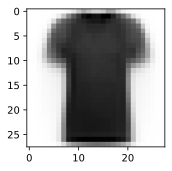

In [4]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

在第二种情况下，我们再次看到平均结果类似于裤子的模糊图像。

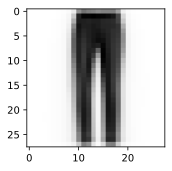

In [5]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

在完全基于机器学习的解决方案中，我们会从数据集中学习阈值。在这种情况下，我只是手动选择了一个在训练数据上看起来不错的阈值。

In [6]:
# Print test set accuracy with eyeballed threshold
w = (ave_1 - ave_0).T
# '@' is Matrix Multiplication operator in pytorch.
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000

# Accuracy
torch.mean((predictions.type(y_test.dtype) == y_test).float(), dtype=torch.float64)

tensor(0.7870, dtype=torch.float64)

## 线性变换的几何

通过 :numref:`sec_linear-algebra` 和上述讨论，我们对向量、长度和角度的几何有了扎实的理解。然而，有一个重要的对象我们还没有讨论过，那就是矩阵所代表的线性变换的几何理解。完全内化矩阵如何在两个可能不同的高维空间之间转换数据需要大量的实践，并且超出了本附录的范围。但是，我们可以从二维开始建立直觉。

假设我们有一些矩阵：

$$
\mathbf{A} = \begin{bmatrix}
a & b \\ c & d
\end{bmatrix}.
$$

如果我们想将这个矩阵应用到任意向量 $\mathbf{v} = [x, y]^\top$ 上，我们进行乘法运算并看到

$$
\begin{aligned}
\mathbf{A}\mathbf{v} & = \begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} \\
& = \begin{bmatrix}ax+by\\ cx+dy\end{bmatrix} \\
& = x\begin{bmatrix}a \\ c\end{bmatrix} + y\begin{bmatrix}b \\d\end{bmatrix} \\
& = x\left\{\mathbf{A}\begin{bmatrix}1\\0\end{bmatrix}\right\} + y\left\{\mathbf{A}\begin{bmatrix}0\\1\end{bmatrix}\right\}.
\end{aligned}
$$

这看起来像是一个奇怪的计算，清晰的东西变得有些难以理解。然而，它告诉我们，我们可以用矩阵如何变换*两个特定向量*来表示矩阵如何变换*任何向量*：$[1,0]^\top$ 和 $[0,1]^\top$。这值得考虑一下。我们实际上已经把一个无限的问题（任何一对实数会发生什么）简化成了一个有限的问题（这些特定向量会发生什么）。这些向量是一个*基*的例子，我们可以将空间中的任何向量写成这些*基向量*的加权和。

让我们画出使用特定矩阵时的情况

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix}.
$$

如果我们看特定向量 $\mathbf{v} = [2, -1]^\top$，我们看到这是 $2\cdot[1,0]^\top + -1\cdot[0,1]^\top$，因此我们知道矩阵 $A$ 会将其发送到 $2(\mathbf{A}[1,0]^\top) + -1(\mathbf{A}[0,1])^\top = 2[1, -1]^\top - [2,3]^\top = [0, -5]^\top$。如果我们仔细遵循这个逻辑，比如说通过考虑所有整数对点的网格，我们会看到发生的事情是矩阵乘法可以扭曲、旋转和平移网格，但网格结构必须保持如你所见在 :numref:`fig_grid-transform` 中。

![矩阵 $\mathbf{A}$ 作用于给定的基向量。请注意整个网格是如何随之移动的。](../img/grid-transform.svg)
:label:`fig_grid-transform`

这是关于由矩阵表示的线性变换最重要的直观理解点。矩阵无法以不同方式扭曲空间的不同部分。它们所能做的就是取原始坐标并对其进行扭曲、旋转和平移。

某些扭曲可能是严重的。例如矩阵

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix},
$$

将整个二维平面压缩到一条线上。识别和处理这种变换是后面章节的主题，但从几何上看，这与我们在上面看到的变换类型有根本不同。例如，来自矩阵 $\mathbf{A}$ 的结果可以“弯曲回”原来的网格。来自矩阵 $\mathbf{B}$ 的结果则不能，因为我们永远不知道向量 $[1,2]^\top$ 是从哪里来的——它是 $[1,1]^\top$ 还是 $[0, -1]^\top$？

虽然这个图示是针对 $2\times2$ 矩阵的，但这并不妨碍我们将学到的经验推广到更高维度。如果我们取类似的基向量如 $[1,0, \ldots,0]$ 并查看我们的矩阵将它们发送到哪里，我们可以开始感受到矩阵乘法如何在我们正在处理的任何维度空间中扭曲整个空间。

## 线性相关

再次考虑矩阵

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix}.
$$

这将整个平面压缩到单一线 $y = 2x$ 上。现在的问题是：是否有办法仅仅通过观察矩阵本身就能检测到这一点？答案是确实可以。让我们取 $\mathbf{b}_1 = [2,4]^\top$ 和 $\mathbf{b}_2 = [-1, -2]^\top$ 作为矩阵 $\mathbf{B}$ 的两列。记住，我们可以将被矩阵 $\mathbf{B}$ 变换的所有内容写成矩阵列的加权和：如 $a_1\mathbf{b}_1 + a_2\mathbf{b}_2$。我们称其为*线性组合*。$\mathbf{b}_1 = -2\cdot\mathbf{b}_2$ 的事实意味着我们可以将这两列的任何线性组合完全用比如 $\mathbf{b}_2$ 来表示，因为

$$
a_1\mathbf{b}_1 + a_2\mathbf{b}_2 = -2a_1\mathbf{b}_2 + a_2\mathbf{b}_2 = (a_2-2a_1)\mathbf{b}_2.
$$

这意味着其中一列在某种意义上是多余的，因为它没有定义空间中的唯一方向。这不应该让我们太惊讶，因为我们已经看到该矩阵将整个平面压缩到了一条线上。此外，我们看到线性相关 $\mathbf{b}_1 = -2\cdot\mathbf{b}_2$ 捕捉到了这一点。为了使这两个向量之间的关系更对称，我们将写作

$$
\mathbf{b}_1  + 2\cdot\mathbf{b}_2 = 0.
$$

一般来说，如果存在系数 $a_1, \ldots, a_k$ *不全为零* 使得

$$
\sum_{i=1}^k a_i\mathbf{v_i} = 0,
$$

我们将会说向量集合 $\mathbf{v}_1, \ldots, \mathbf{v}_k$ 是*线性相关的*。在这种情况下，我们可以用其他向量的组合来解出其中一个向量，从而有效地使其多余。因此，矩阵列中的线性相关性是矩阵将空间压缩到更低维度的证据。如果没有线性相关性，我们说向量是*线性无关的*。如果矩阵的列是线性无关的，则不会发生压缩，操作可以撤销。

## 秩

如果我们有一个一般的 $n\times m$ 矩阵，问这个矩阵映射到哪个维度的空间是合理的。一个称为*秩*的概念将是我们要找的答案。在上一节中，我们注意到线性相关性表明空间被压缩到了更低维度，因此我们将能够利用这一点来定义秩的概念。特别地，矩阵 $\mathbf{A}$ 的秩是在所有列子集中的最大线性无关列数。例如，矩阵

$$
\mathbf{B} = \begin{bmatrix}
2 & 4 \\ -1 & -2
\end{bmatrix},
$$

具有 $\textrm{rank}(B)=1$，因为两列是线性相关的，但单独的任一列不是线性相关的。对于一个更具挑战性的例子，我们可以考虑

$$
\mathbf{C} = \begin{bmatrix}
1& 3 & 0 & -1 & 0 \\
-1 & 0 & 1 & 1 & -1 \\
0 & 3 & 1 & 0 & -1 \\
2 & 3 & -1 & -2 & 1
\end{bmatrix},
$$

并展示 $\mathbf{C}$ 具有秩二，因为例如前两列是线性无关的，然而任何三列的四个集合都是依赖的。

正如描述的过程，这种方法非常低效。它要求查看给定矩阵的每一列子集，因此潜在地是列数的指数级。稍后我们将看到一种更高效的计算矩阵秩的方法，但现在，这足以看到概念是明确定义的并理解其含义。

## 可逆性

我们已经看到，具有线性相关列的矩阵的乘法是不可逆的，即没有总是可以恢复输入的逆操作。然而，满秩矩阵（即某个 $n \times n$ 矩阵且秩为 $n$）的乘法应该总是可以撤销的。考虑矩阵

$$
\mathbf{I} = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}.
$$

这是一个对角线为 1，其余位置为 0 的矩阵。我们称其为*单位矩阵*。它是应用后不会改变数据的矩阵。要找到一个可以撤销矩阵 $\mathbf{A}$ 所做操作的矩阵，我们需要找到一个矩阵 $\mathbf{A}^{-1}$ 使得

$$
\mathbf{A}^{-1}\mathbf{A} = \mathbf{A}\mathbf{A}^{-1} =  \mathbf{I}.
$$

如果我们把这个看作一个系统，我们有 $n \times n$ 个未知数（$\mathbf{A}^{-1}$ 的条目）和 $n \times n$ 个方程（$\mathbf{A}^{-1}\mathbf{A}$ 的每个条目和 $\mathbf{I}$ 的每个条目之间必须相等的等式），所以我们通常期望存在一个解。事实上，在下一节中我们将看到一个称为*行列式*的量，只要行列式不为零，我们就可以找到解。我们称这样的矩阵 $\mathbf{A}^{-1}$ 为*逆矩阵*。作为一个例子，如果 $\mathbf{A}$ 是一般 $2 \times 2$ 矩阵

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix},
$$

那么我们可以看到逆矩阵是

$$
 \frac{1}{ad-bc}  \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}.
$$

我们可以通过实际测试来看到，按上述公式给出的逆矩阵确实有效。

In [7]:
M = torch.tensor([[1, 2], [1, 4]], dtype=torch.float32)
M_inv = torch.tensor([[2, -1], [-0.5, 0.5]])
M_inv @ M

tensor([[1., 0.],
        [0., 1.]])

### 数值问题
虽然矩阵的逆在理论上很有用，
但我们必须说，在实践中大多数时候我们并不希望
使用矩阵逆来解决问题。
一般来说，解线性方程如

$$
\mathbf{A}\mathbf{x} = \mathbf{b},
$$

有比计算逆矩阵并乘以得到

$$
\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}.
$$

更为数值稳定的算法。

就像除以一个小数可能导致数值不稳定一样，
接近低秩的矩阵求逆也可能导致数值不稳定。

此外，通常矩阵$\mathbf{A}$是*稀疏*的，
也就是说它只包含少量非零值。
如果我们研究一些例子，我们会发现
这并不意味着逆矩阵也是稀疏的。
即使$\mathbf{A}$是一个$100$万乘以$100$万的矩阵
只有$500$万个非零元素
（因此我们只需要存储这$500$万个），
其逆矩阵通常几乎每个元素都是非零的，
需要我们存储所有$1\textrm{M}^2$个元素---即$1$万亿个元素！

虽然我们没有时间深入探讨在线性代数中
经常遇到的所有棘手的数值问题，
但我们想为您提供一些关于何时需要谨慎行事的直觉，
通常避免在实践中求逆是一个很好的经验法则。

## 行列式
线性代数的几何视角提供了一种直观的方式来解释一个称为*行列式*的基本量。
考虑之前的网格图像，但现在有一个突出显示的区域（:numref:`fig_grid-filled`）。

![矩阵$\mathbf{A}$再次扭曲了网格。这一次，我想特别指出高亮显示的正方形发生了什么变化。](../img/grid-transform-filled.svg)
:label:`fig_grid-filled`

看看高亮显示的正方形。这是一个边由$(0, 1)$和$(1, 0)$给出的正方形，因此它的面积为一。
经过$\mathbf{A}$变换后，
我们看到它变成了一个平行四边形。
这个平行四边形没有理由保持原来的面积，
实际上，在这里展示的具体情况下

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix},
$$

通过坐标几何计算
可以得出该平行四边形的面积为$5$。

一般而言，如果我们有一个矩阵

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix},
$$

我们可以计算出结果平行四边形的面积为$ad-bc$。
这个面积被称为*行列式*。

让我们快速用一些示例代码检查一下。

In [8]:
torch.det(torch.tensor([[1, -1], [2, 3]], dtype=torch.float32))

tensor(5.)

眼尖的人会注意到，这个表达式可以为零甚至为负。对于负数项，这是一个惯例问题，在数学中通常这样处理：如果矩阵翻转了图形，我们说面积被取反。现在让我们看看当行列式为零时，我们会学到更多。

考虑

$$
\mathbf{B} = \begin{bmatrix}
2 & 4 \\ -1 & -2
\end{bmatrix}.
$$

如果我们计算这个矩阵的行列式，我们得到$2\cdot(-2) - 4\cdot(-1) = 0$。根据上面的理解，这是有道理的。$\mathbf{B}$将原图像中的正方形压缩成一条线段，其面积为零。实际上，被压缩到更低维度的空间是变换后面积为零的唯一方式。因此我们看到以下结果是正确的：一个矩阵$A$可逆当且仅当行列式不等于零。

最后补充一点，想象我们在平面上画了一个任意图形。像计算机科学家一样思考，我们可以把这个图形分解成一系列小正方形，这样图形的面积基本上就是这些小正方形的数量。如果现在用一个矩阵变换这个图形，我们将每个这样的正方形变换成平行四边形，每个平行四边形的面积由行列式给出。我们看到，对于任何图形，行列式给出了矩阵按比例缩放任何图形面积的（带符号的）数值。

对于更大的矩阵计算行列式可能很繁琐，但直觉是一样的。行列式仍然是$n\times n$矩阵缩放$n$维体积的因素。

## 张量和常见的线性代数运算

在 :numref:`sec_linear-algebra` 中介绍了张量的概念。在本节中，我们将更深入地探讨张量收缩（张量等同于矩阵乘法），并看到它如何提供一系列矩阵和向量运算的统一视图。

对于矩阵和向量，我们知道如何通过它们相乘来转换数据。如果张量对我们有用，我们也需要对它们有一个类似的定义。想想矩阵乘法：

$$
\mathbf{C} = \mathbf{A}\mathbf{B},
$$

或等价地

$$ c_{i, j} = \sum_{k} a_{i, k}b_{k, j}.$$

这种模式是我们可以在张量上重复使用的。对于张量来说，没有一种通用的选择可以确定我们要对哪些索引求和，所以我们需要明确指定我们想要求和的具体索引。例如我们可以考虑

$$
y_{il} = \sum_{jk} x_{ijkl}a_{jk}.
$$

这样的变换被称为*张量收缩*。它可以代表比单独的矩阵乘法更加灵活的一系列变换。

作为一种常用的简化记法，我们可以注意到求和恰好是在表达式中出现超过一次的所有索引上进行的，因此人们经常使用*爱因斯坦记号*，其中隐含地对所有重复的索引求和。这给出了紧凑的表达式：

$$
y_{il} = x_{ijkl}a_{jk}.
$$

### 线性代数中常见的例子

让我们看看之前见过的许多线性代数定义如何能用这种压缩的张量表示法表达：

* $\mathbf{v} \cdot \mathbf{w} = \sum_i v_iw_i$
* $\|\mathbf{v}\|_2^{2} = \sum_i v_iv_i$
* $(\mathbf{A}\mathbf{v})_i = \sum_j a_{ij}v_j$
* $(\mathbf{A}\mathbf{B})_{ik} = \sum_j a_{ij}b_{jk}$
* $\textrm{tr}(\mathbf{A}) = \sum_i a_{ii}$

这样，我们可以用简短的张量表达式取代众多专门的记号。

### 代码中的表达
张量也可以在代码中灵活操作。如 :numref:`sec_linear-algebra` 所示，我们可以如下创建张量。

In [9]:
# Define tensors
B = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
A = torch.tensor([[1, 2], [3, 4]])
v = torch.tensor([1, 2])

# Print out the shapes
A.shape, B.shape, v.shape

(torch.Size([2, 2]), torch.Size([2, 2, 3]), torch.Size([2]))

爱因斯坦求和已经被直接实现。
在爱因斯坦求和中出现的指标可以作为一个字符串传递，
后面跟着要操作的张量。
例如，要实现矩阵乘法，
我们可以考虑上面看到的爱因斯坦求和
（$\mathbf{A}\mathbf{v} = a_{ij}v_j$）
并去掉指标本身来得到实现：

In [10]:
# Reimplement matrix multiplication
torch.einsum("ij, j -> i", A, v), A@v

(tensor([ 5, 11]), tensor([ 5, 11]))

这是一个非常灵活的记法。
例如，如果我们想计算
传统上会写作

$$
c_{kl} = \sum_{ij} \mathbf{b}_{ijk}\mathbf{a}_{il}v_j.
$$

可以通过爱因斯坦求和约定实现为：

In [11]:
torch.einsum("ijk, il, j -> kl", B, A, v)

tensor([[ 90, 126],
        [102, 144],
        [114, 162]])

这种记法对人类来说是可读且高效的，
然而如果出于某种原因需要程序生成张量收缩时则显得冗长。
因此，`einsum`提供了一种替代记法，
通过为每个张量提供整数索引。
例如，同样的张量收缩也可以写成：

In [12]:
# PyTorch does not support this type of notation.

任一记号都允许在代码中简洁高效地表示张量收缩。

## 总结
* 向量可以被几何解释为点或空间中的方向。
* 点积定义了任意高维空间中的角度概念。
* 超平面是线和平面的高维推广。它们可用于定义决策平面，这通常用作分类任务的最后一步。
* 矩阵乘法可以几何解释为对基础坐标的均匀变形。它们代表了一种非常受限但数学上干净的方法来变换向量。
* 线性相关是一种方法，用于判断一组向量是否处于比预期更低维度的空间（比如说你有3个向量生活在2维空间中）。矩阵的秩是指其列中最大线性独立子集的大小。
* 当矩阵的逆存在时，矩阵求逆允许我们找到另一个矩阵以取消第一个矩阵的作用。理论上矩阵求逆是有用的，但在实践中由于数值不稳定性需要小心处理。
* 行列式允许我们测量一个矩阵如何扩张或收缩空间。非零行列式意味着可逆（非奇异）矩阵，而零值行列式意味着矩阵不可逆（奇异）。
* 张量收缩和爱因斯坦求和提供了一种整洁且清晰的符号，用于表达机器学习中看到的许多计算。

## 练习
1. 之间的角度是多少
$$
\vec v_1 = \begin{bmatrix}
1 \\ 0 \\ -1 \\ 2
\end{bmatrix}, \qquad \vec v_2 = \begin{bmatrix}
3 \\ 1 \\ 0 \\ 1
\end{bmatrix}?
$$
2. 判断题：$\begin{bmatrix}1 & 2\\0&1\end{bmatrix}$ 和 $\begin{bmatrix}1 & -2\\0&1\end{bmatrix}$ 是互逆的吗？
3. 假设我们在平面上画了一个面积为 $100\textrm{m}^2$ 的形状。通过矩阵
$$
\begin{bmatrix}
2 & 3\\
1 & 2
\end{bmatrix}.
$$
变换后，这个图形的面积是多少？
4. 下列哪组向量是线性独立的？
 * $\left\{\begin{pmatrix}1\\0\\-1\end{pmatrix}, \begin{pmatrix}2\\1\\-1\end{pmatrix}, \begin{pmatrix}3\\1\\1\end{pmatrix}\right\}$
 * $\left\{\begin{pmatrix}3\\1\\1\end{pmatrix}, \begin{pmatrix}1\\1\\1\end{pmatrix}, \begin{pmatrix}0\\0\\0\end{pmatrix}\right\}$
 * $\left\{\begin{pmatrix}1\\1\\0\end{pmatrix}, \begin{pmatrix}0\\1\\-1\end{pmatrix}, \begin{pmatrix}1\\0\\1\end{pmatrix}\right\}$
5. 假设你有一个矩阵写作 $A = \begin{bmatrix}c\\d\end{bmatrix}\cdot\begin{bmatrix}a & b\end{bmatrix}$ 对于某些选择的值 $a, b, c$ 和 $d$。判断题：这样的矩阵的行列式总是0吗？
6. 向量 $e_1 = \begin{bmatrix}1\\0\end{bmatrix}$ 和 $e_2 = \begin{bmatrix}0\\1\end{bmatrix}$ 是正交的。对于矩阵 $A$ 来说，使得 $Ae_1$ 和 $Ae_2$ 正交的条件是什么？
7. 如何使用爱因斯坦记号写出任意矩阵 $A$ 的 $\textrm{tr}(\mathbf{A}^4)$？

[讨论](https://discuss.d2l.ai/t/1084)